In [58]:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [26]:
Height = 128
Width = 128
NumberOfCategories = 3


In [27]:
#Train
allImages = []
maskImages = []


In [49]:
#Test
allTestImages = []
maskTestImages = []

In [29]:
path = "/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/"
trainFile = path + "annotations/trainval.txt"
testFile = path + "annotations/test.txt"

In [30]:
print("Load train data : ")
df = pd.read_csv(trainFile, sep=" ", header=None)
names = df[0].values # get the list of files
print ("Train data info :")
print(len(names))

Load train data : 
Train data info :
3680


In [31]:
for name in names:
    imageFileName = path + "images/" + name + ".jpg"
    print(imageFileName)

    img = cv2.imread(imageFileName , cv2.IMREAD_COLOR)
    img = cv2.resize(img, (Width,Height))
    img = img / 255.0
    img = img.astype(np.float32)
    allImages.append(img)

     # mask
    maskFileName = path + "annotations/trimaps/" + name + ".png"
    mask = cv2.imread(maskFileName , cv2.IMREAD_GRAYSCALE) # gray scale images
    mask = cv2.resize(mask , (Width, Height))
    maskImages.append(mask) 

#print(len(allImages))
#print(len(maskImages))

/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_100.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_101.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_102.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_103.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_104.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_105.jpg
/Users/sunilkumarpradhan/Per

Corrupt JPEG data: premature end of data segment


/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_134.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_135.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_136.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_137.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_138.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/beagle_139.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Pr

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/english_cocker_spaniel_110.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/english_cocker_spaniel_111.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/english_cocker_spaniel_112.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/english_cocker_spaniel_113.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/english_cocker_spaniel_114.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data

In [32]:
allImagesNP = np.array(allImages)
maskImagesNP = np.array(maskImages)
maskImagesNP = maskImagesNP.astype(int)

print(allImagesNP.shape)
print(allImagesNP.dtype)

print(maskImagesNP.shape)
print(maskImagesNP.dtype)


(3680, 128, 128, 3)
float32
(3680, 128, 128)
int64


In [33]:
#lets display and learn about mask.
#lets load one image from the numpy array and print it in the reduced size.

x = cv2.resize(maskImagesNP[0],(16,16), interpolation =  cv2.INTER_NEAREST)
print(x)

#Value = 1 - main object
#value 2 : Background
#Value 3 : Border of the object

# We have to replace the valu between 0 ->2
#loop each row in th array

for i in range(len(x)):

    #loop through each element in the row
    for j in range(len(x[i])):

        #replace the values
        v = x[i][j]

        if v==1:
            x[i][j] = 0 #the object
            
        if v==2:
            x[i][j] = 22  #the background

        if v==3:
            x[i][j] = 333  # the object boarder

print(x)   #show the result

    

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 3 2 2 2 3 1 2 2]
 [2 2 2 2 2 2 3 1 1 3 3 3 1 3 2 2]
 [2 2 2 2 2 2 3 1 1 1 1 1 1 3 2 2]
 [2 2 2 2 3 1 1 1 1 1 1 1 1 3 2 2]
 [2 2 2 3 1 1 1 1 1 1 1 1 1 3 2 2]
 [2 2 3 1 1 1 1 1 1 1 1 1 3 3 2 2]
 [2 2 3 1 1 1 1 1 1 1 1 3 2 2 2 2]
 [2 2 3 1 1 1 1 1 1 1 1 2 2 2 2 2]
 [2 2 3 1 1 1 1 1 1 1 1 3 2 2 2 2]
 [2 2 3 1 1 1 1 1 1 3 2 2 2 2 2 2]
 [2 2 2 3 3 3 1 1 3 2 2 2 2 2 2 2]
 [2 2 2 2 3 3 3 1 3 2 2 2 2 2 2 2]
 [2 2 2 2 3 1 1 3 2 2 2 2 2 2 2 2]]
[[ 22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22]
 [ 22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22]
 [ 22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22]
 [ 22  22  22  22  22  22  22  22 333  22  22  22 333   0  22  22]
 [ 22  22  22  22  22  22 333   0   0 333 333 333   0 333  22  22]
 [ 22  22  22  22  22  22 333   0   0   0   0   0   0 333  22  22]
 [ 22  22  22  22 333   0   0   0   0

In [50]:

#Load test data
print("load test data:")

df = pd.read_csv(testFile, sep=" ", header=None)
names = df[0].values #get the list of files

print("train data info :")
print(len(names))

#load the image


for name in names :
    imageFileName = path + "images/" + name + ".jpg"
    print(imageFileName)

    img = cv2.imread(imageFileName , cv2.IMREAD_COLOR)
    img = cv2.resize(img, (Width,Height))
    img = img / 255.0
    img = img.astype(np.float32)
    allTestImages.append(img)

    # mask
    maskFileName = path + "annotations/trimaps/" + name + ".png"
    mask = cv2.imread(maskFileName , cv2.IMREAD_GRAYSCALE) # gray scale images
    mask = cv2.resize(mask , (Width, Height))
    maskTestImages.append(mask)

print(len(allImages))
#print(len(maskImages))




load test data:
train data info :
3669
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_201.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_202.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_204.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_205.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_206.jpg
/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssini

In [52]:
allTestImagesNP = np.array(allTestImages)
maskTestImagesNP = np.array(maskTestImages)
maskTestImagesNP = maskTestImagesNP.astype(int)

print(allTestImagesNP.shape)
print(allTestImagesNP.dtype)

print(maskTestImagesNP.shape)
print(maskTestImagesNP.dtype)

print("Save the Data :")
np.save("/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Unet-Animals-train-images.npy", allImagesNP)
np.save("/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Unet-Animals-train-mask.npy", maskImagesNP)
np.save("/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Unet-Animals-test-images.npy", allTestImagesNP)
np.save("/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Unet-Animals-test-mask.npy", maskTestImagesNP)
print("Finish save the data !")

(3669, 128, 128, 3)
float32
(3669, 128, 128)
int64
Save the Data :
Finish save the data !


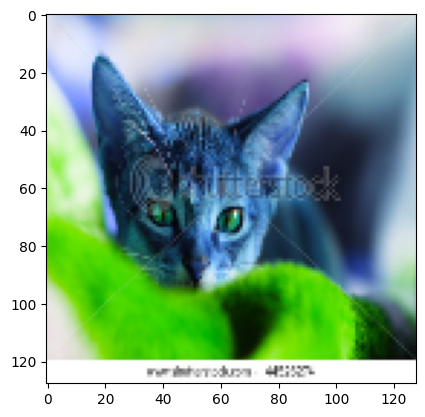

In [ ]:
#img1 = cv2.imread("/Users/sunilkumarpradhan/Personal_Projects/Github_Profile/Object_Segmetation_Project/Object_Segmentation_data/Oxford_IIIT_Pet_Data_Dogs/images/Abyssinian_100.jpg",0)
#img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # for color image
plt.imshow(img,cmap="gray")

In [101]:
allImagesNP[1][1].shape

(128, 3)

Next need to use Unate model

In [ ]:
img1 = cv2.Sobel(img,cv2.CV_64F,1,0,5) #Horizontal
img2 = cv2.Sobel(img,cv2.CV_64F,0,1,5) #Vertical

plt.subplot(1,3,1),plt.imshow(img, cmap = "gray"),plt.title("original_img")
plt.subplot(1,3,2),plt.imshow(img1, cmap = "gray"),plt.title("Horizontal Sobel")
plt.subplot(1,3,3),plt.imshow(img2, cmap = "gray"),plt.title("Vertical Sobel")